<a href="https://colab.research.google.com/github/Senek18/engineer-thesis/blob/main/DLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Thessi/train_finally.csv')

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
train = reduce_mem_usage(train)

Mem. usage decreased to 578.14 Mb (81.2% reduction)


In [5]:
train

,Electricity,ChilledWater,Steam,HotWater,building_id,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,1,0,0,0,0,0.000000,0,0,8.914062,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0,1,4,1
1,1,0,0,0,1,0.000000,0,0,7.910156,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0,1,4,1
2,1,0,0,0,2,0.000000,0,0,8.593750,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0,1,4,1
3,1,0,0,0,3,0.000000,0,0,10.070312,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0,1,4,1
4,1,0,0,0,4,0.000000,0,0,11.664062,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20207311,1,0,0,0,1444,2.277344,15,1,9.882812,1.700195,0.0,-5.601562,-1.0,1008.5,180.0,8.796875,23,31,5,12
20207312,1,0,0,0,1445,1.761719,15,0,8.367188,1.700195,0.0,-5.601562,-1.0,1008.5,180.0,8.796875,23,31,5,12
20207313,1,0,0,0,1446,0.000000,15,1,9.328125,1.700195,0.0,-5.601562,-1.0,1008.5,180.0,8.796875,23,31,5,12
20207314,1,0,0,0,1447,5.078125,15,4,10.304688,1.700195,0.0,-5.601562,-1.0,1008.5,180.0,8.796875,23,31,5,12


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.3)

In [7]:
x_train = train.drop(['meter_reading'],axis=1)

In [8]:
y_train = train['meter_reading']

In [9]:
x_test = test.drop(['meter_reading'],axis=1)

In [10]:
y_test = test['meter_reading']

In [11]:
dim = len(x_train.columns)

In [12]:
model = Sequential()
model.add(Dense(8, input_dim=dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [13]:
model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
442036/442036 [==============================] - 751s 2ms/step - loss: 2.7351 - mse: 2.7351
Epoch 2/3
442036/442036 [==============================] - 744s 2ms/step - loss: 2.5395 - mse: 2.5395
Epoch 3/3
442036/442036 [==============================] - 743s 2ms/step - loss: 2.4924 - mse: 2.4924


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [15]:
y_test_learn = model.predict(x_test)
y_test_learn = pd.DataFrame(y_test_learn, columns = ['meter_reading_pred'])
rmse = sqrt(mean_squared_error(y_test, y_test_learn))
print(rmse)

1.5610467637686212


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 160       
                                                                 
 dense_1 (Dense)             (None, 64)                576       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [17]:
test_predictions = model.predict(x_test).flatten()

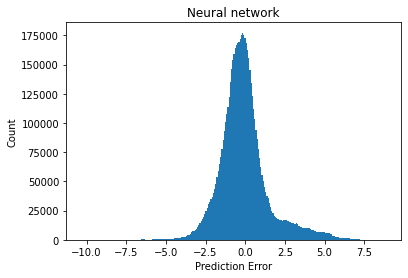

In [24]:
import matplotlib
import matplotlib.pyplot as plt

error = test_predictions - y_test
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error")
plt.title('Neural network')
_ = plt.ylabel("Count")

In [19]:
type(y_test)

pandas.core.series.Series

In [20]:
def R_squared(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.div(residual, total))
  return r2

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(y_test, y_test_learn)

In [23]:
r2

0.4679414300181476